# Session 3 - Comparing color historgrams

In [1]:
import os
import sys
sys.path.append('..')

import cv2
import numpy as np 
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [30]:
filepath = os.path.join('..',
    '..',
    '..',
    'cds-vis-data',
    'data',
    'img',
    'coins.png'
)

In [32]:
image = cv2.imread(filepath)

In [11]:
hist = cv2.calcHist([image], [0], None, [255], [0,256])

In [13]:
hist.shape

(255, 1)

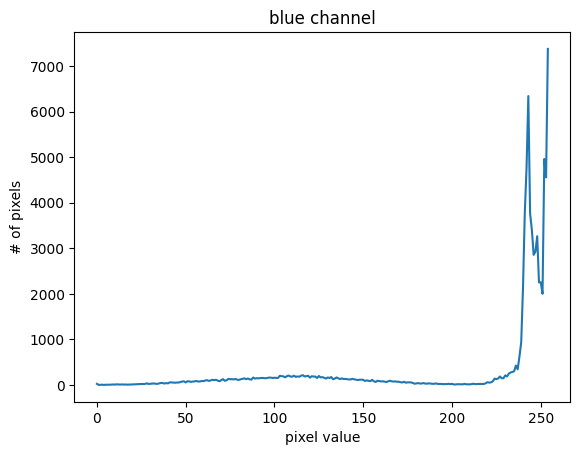

In [14]:
plt.figure()

plt.plot(hist)

plt.title("blue channel")

plt.xlabel("pixel value")

plt.ylabel("# of pixels")

plt.show()

In [20]:
#using cv2.split
BLUE, GREEN, RED = cv2.split(image)

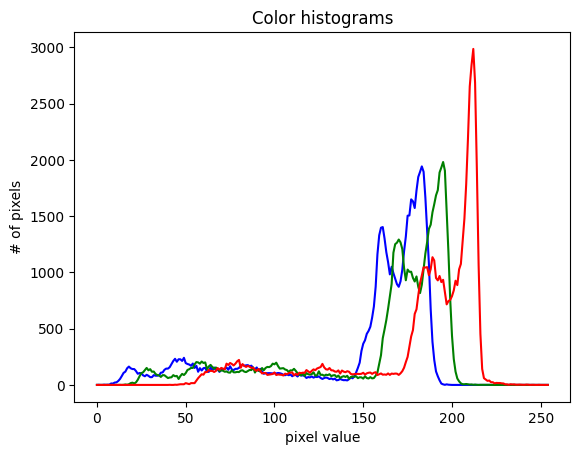

In [35]:
# create tuples
channels = cv2.split(image)

# create colour tuple
colors = ("blue", "green", "red")

# create plot
plt.figure()

# title
plt.title("Color histograms")

# name of x axis
plt.xlabel("pixel value")

# name of y axis
plt.ylabel("# of pixels")

i = 0
for channel in channels:
    # histogram of values for single channel
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    plt.plot(hist, color=colors[i])
    i += 1
plt.show()

## Comparing histograms

In [48]:
filepath_1 = os.path.join(
    '..',
    '..',
    '..',
    'cds-vis-data',
    'data',
    'img',
    'trex.png'
)

filepath_2 = os.path.join(
    '..',
    '..',
    '..',
    'cds-vis-data',
    'data',
    'img',
    't-rex2.png'
)

In [49]:
image_1 = cv2.imread(filepath_1)
image_2 = cv2.imread(filepath_2)

In [54]:
hist_1 = cv2.calcHist([image_1], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

In [59]:
normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)

In [65]:
round(cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR), 2)

33.77

## Play around